In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('fake_job_postings.csv') 

# Basic info
print(df.shape)
df.head()

(17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
# Check info and missing values
print(df.info())

# Percentage of missing values per column
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
# Example: Drop columns with more than 50% missing data
threshold = 50
cols_to_drop = missing_percent[missing_percent > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

print(f"Dropped columns: {list(cols_to_drop)}")

Dropped columns: ['department', 'salary_range']


In [9]:
# For text columns, fill missing with empty string
df['description'] = df['description'].fillna('')

# For categorical columns, fill missing with mode or 'Unknown'
df['company_profile'] = df['company_profile'].fillna('Unknown')
df['benefits'] = df['benefits'].fillna('None')
# Repeat for other text columns you want to keep

# Or drop rows where label (target) is missing if any
df.dropna(subset=['fraudulent'], inplace=True)

In [11]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Removed {initial_rows - df.shape[0]} duplicate rows.")

Removed 0 duplicate rows.


In [14]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text)
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply cleaning to the description column
df['clean_description'] = df['description'].apply(clean_text)

# Create a text length feature
df['description_length'] = df['description'].apply(lambda x: len(str(x)))

# See a sample
print(df[['description', 'clean_description', 'description_length']].head())


                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                   clean_description  description_length  
0  food52 fastgrowing james beard awardwinning on...                 905  
1  organised focused vibrant awesomedo passion cu...                2077  
2  client located houston actively seeking experi...                 355  
3  company esri environmental system research ins...                2600  
4  job title itemization review managerlocation f...                1520  


In [17]:
df['description_length'] = df['description'].apply(lambda x: len(str(x)))

In [19]:
print(df[['description', 'clean_description', 'description_length']].head())

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                   clean_description  description_length  
0  food52 fastgrowing james beard awardwinning on...                 905  
1  organised focused vibrant awesomedo passion cu...                2077  
2  client located houston actively seeking experi...                 355  
3  company esri environmental system research ins...                2600  
4  job title itemization review managerlocation f...                1520  


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# For nice visuals
sns.set(style="whitegrid")

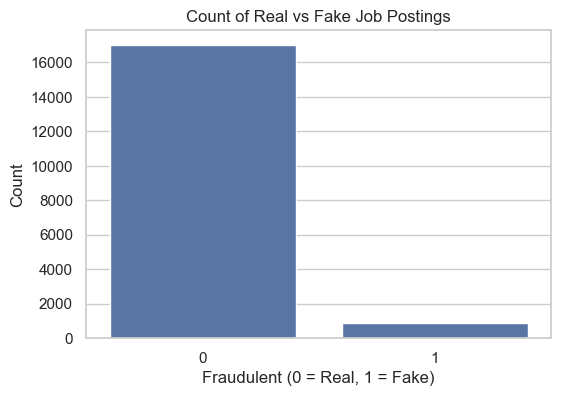

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='fraudulent', data=df)
plt.title("Count of Real vs Fake Job Postings")
plt.xlabel("Fraudulent (0 = Real, 1 = Fake)")
plt.ylabel("Count")
plt.show()

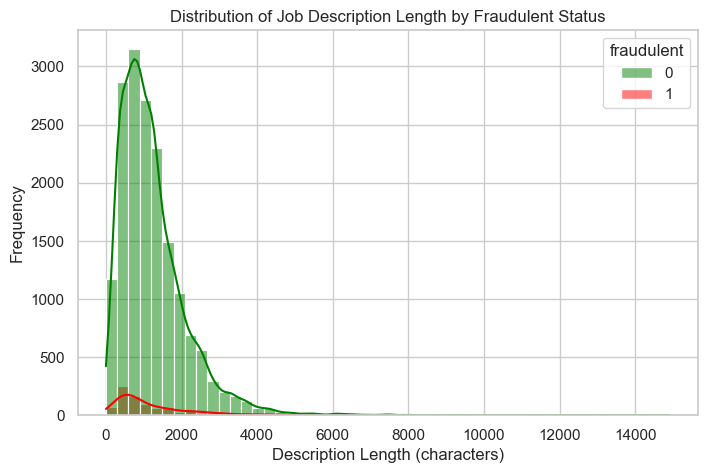

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='description_length', hue='fraudulent', bins=50, kde=True, palette=['green', 'red'])
plt.title("Distribution of Job Description Length by Fraudulent Status")
plt.xlabel("Description Length (characters)")
plt.ylabel("Frequency")
plt.show()

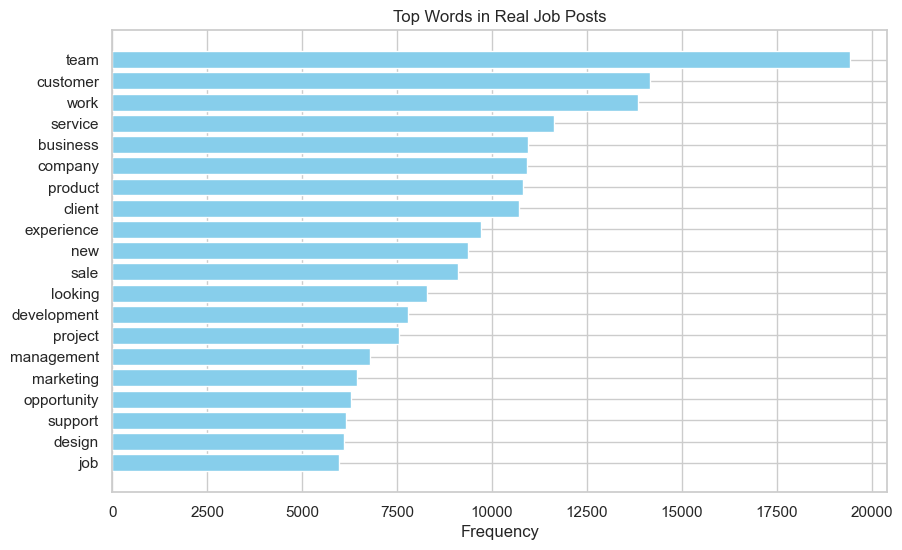

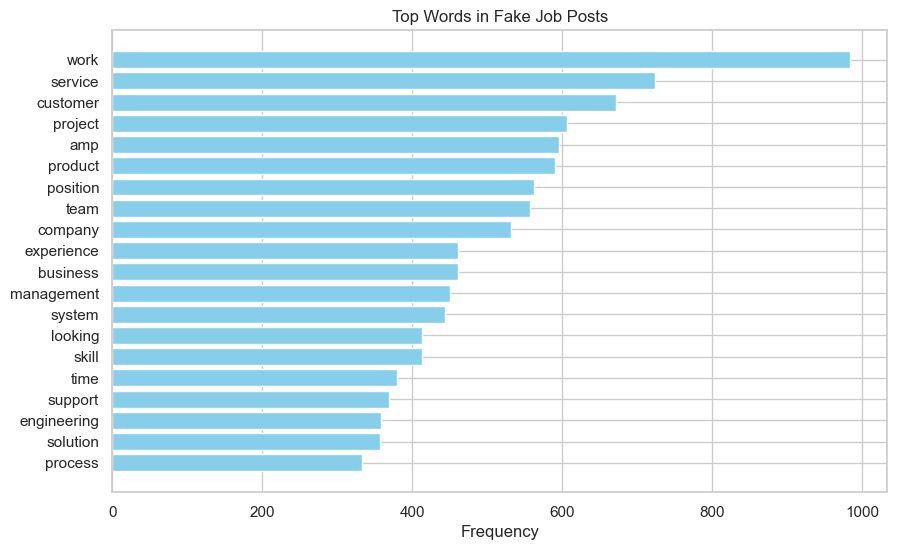

In [29]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_top_words(text_series, title, n=20):
    all_words = " ".join(text_series).split()
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(n)
    
    words = [word for word, count in common_words]
    counts = [count for word, count in common_words]
    
    plt.figure(figsize=(10,6))
    plt.barh(words[::-1], counts[::-1], color='skyblue')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.show()

# Real job posts
plot_top_words(df[df['fraudulent'] == 0]['clean_description'], 'Top Words in Real Job Posts')

# Fake job posts
plot_top_words(df[df['fraudulent'] == 1]['clean_description'], 'Top Words in Fake Job Posts')


In [31]:
df['num_uppercase_words'] = df['description'].apply(lambda x: sum(1 for w in str(x).split() if w.isupper()))

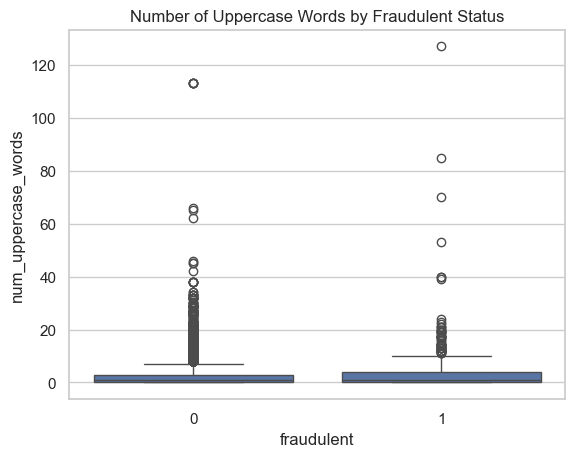

In [33]:
sns.boxplot(x='fraudulent', y='num_uppercase_words', data=df)
plt.title("Number of Uppercase Words by Fraudulent Status")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

X = df[['description_length', 'num_uppercase_words']]  
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3395
           1       0.41      0.31      0.36       181

    accuracy                           0.94      3576
   macro avg       0.69      0.65      0.66      3576
weighted avg       0.94      0.94      0.94      3576



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3395
           1       0.41      0.31      0.36       181

    accuracy                           0.94      3576
   macro avg       0.69      0.65      0.66      3576
weighted avg       0.94      0.94      0.94      3576



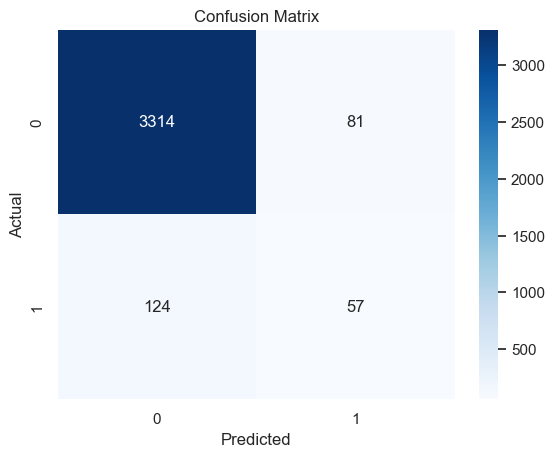

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
# Number of uppercase words in description
df['num_uppercase_words'] = df['description'].apply(lambda x: sum(1 for w in str(x).split() if w.isupper()))

# Count of digits in description
df['num_digits'] = df['description'].apply(lambda x: sum(c.isdigit() for c in str(x)))

# Count of exclamation marks
df['num_exclamations'] = df['description'].apply(lambda x: str(x).count('!'))

# Presence of URL (1 if url present else 0)
df['has_url'] = df['description'].apply(lambda x: 1 if 'http' in str(x).lower() else 0)


In [47]:
from sklearn.model_selection import train_test_split

# Features for now (add more if you engineer)
features = ['description_length', 'num_uppercase_words', 'num_digits', 'num_exclamations', 'has_url']

X = df[features]
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3395
           1       0.65      0.45      0.53       181

    accuracy                           0.96      3576
   macro avg       0.81      0.72      0.76      3576
weighted avg       0.95      0.96      0.96      3576



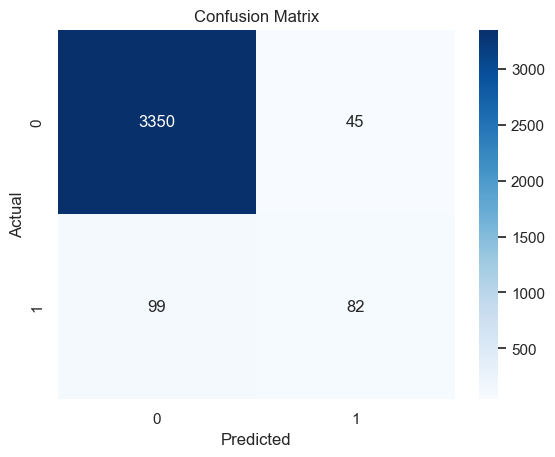

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [53]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'<.*?>', '', str(text))  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['description'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       0.99      0.56      0.71       181

    accuracy                           0.98      3576
   macro avg       0.98      0.78      0.85      3576
weighted avg       0.98      0.98      0.97      3576



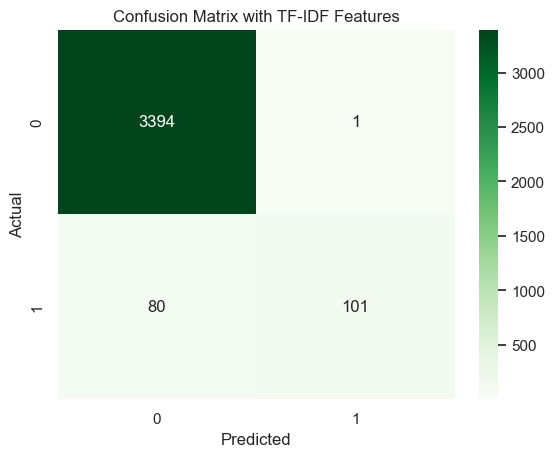

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Initialize TF-IDF vectorizer (limit max features for speed)
tfidf = TfidfVectorizer(max_features=5000)

# Fit on train + test clean text (or just all text)
tfidf_matrix = tfidf.fit_transform(df['clean_text'])

# Convert numeric features to sparse matrix
import numpy as np
from scipy import sparse

numeric_features = df[features].values
numeric_sparse = sparse.csr_matrix(numeric_features)

# Combine numeric + text features
X_all = hstack([numeric_sparse, tfidf_matrix])

# Split again into train and test with same indices as before
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y, test_size=0.2, random_state=42)

# Train model on combined features
model_all = RandomForestClassifier(random_state=42)
model_all.fit(X_train_all, y_train_all)

y_pred_all = model_all.predict(X_test_all)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test_all, y_pred_all))

cm = confusion_matrix(y_test_all, y_pred_all)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with TF-IDF Features')
plt.show()


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer with max 5000 features
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the clean_text column
X = tfidf.fit_transform(df['clean_text'])

In [59]:
y = df['fraudulent']  # Assuming 0 = Real, 1 = Fake

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9650447427293065
Confusion Matrix:
 [[3395    0]
 [ 125   56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3395
           1       1.00      0.31      0.47       181

    accuracy                           0.97      3576
   macro avg       0.98      0.65      0.73      3576
weighted avg       0.97      0.97      0.96      3576



C:\Users\aditi\AppData\Local\Temp\ipykernel_19176\185540654.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fraudulent', palette='Set2')


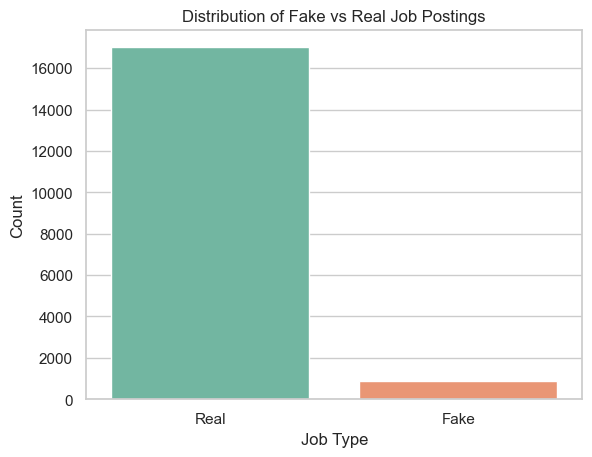

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='fraudulent', palette='Set2')
plt.title("Distribution of Fake vs Real Job Postings")
plt.xticks([0, 1], ['Real', 'Fake'])
plt.ylabel("Count")
plt.xlabel("Job Type")
plt.show()

C:\Users\aditi\AppData\Local\Temp\ipykernel_19176\2188843398.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=real_df, x='count', y='word', ax=axes[0], palette='Blues_d')
C:\Users\aditi\AppData\Local\Temp\ipykernel_19176\2188843398.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fake_df, x='count', y='word', ax=axes[1], palette='Reds_d')


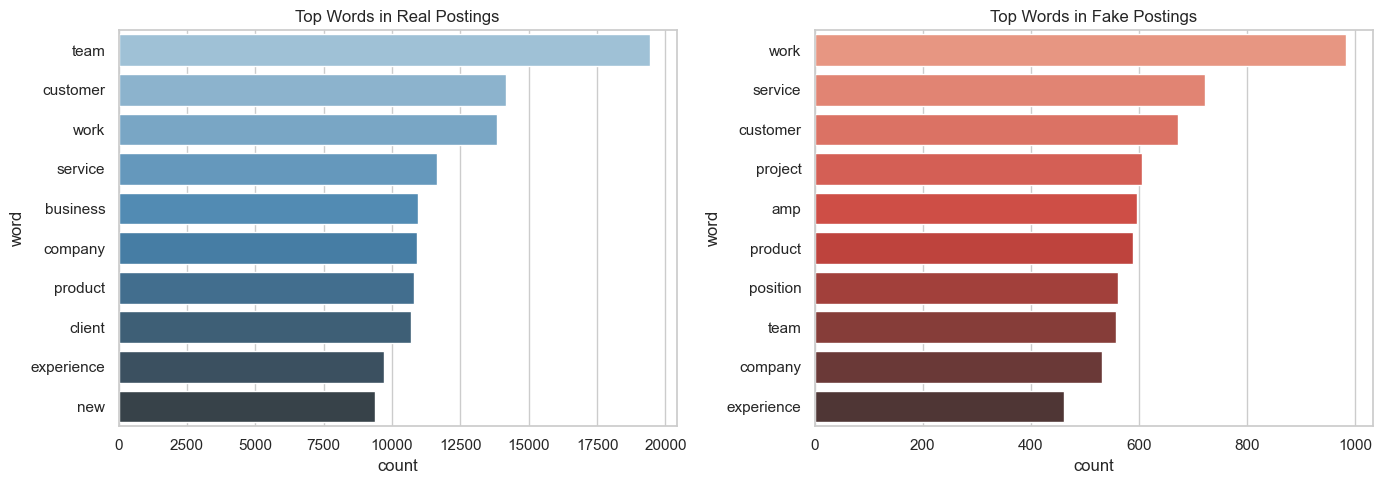

In [69]:
from collections import Counter

# Split text into lists of words
real_words = " ".join(df[df['fraudulent'] == 0]['clean_text']).split()
fake_words = " ".join(df[df['fraudulent'] == 1]['clean_text']).split()

# Count frequency
real_freq = Counter(real_words).most_common(10)
fake_freq = Counter(fake_words).most_common(10)

# Convert to DataFrame for plotting
real_df = pd.DataFrame(real_freq, columns=['word', 'count'])
fake_df = pd.DataFrame(fake_freq, columns=['word', 'count'])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=real_df, x='count', y='word', ax=axes[0], palette='Blues_d')
axes[0].set_title("Top Words in Real Postings")

sns.barplot(data=fake_df, x='count', y='word', ax=axes[1], palette='Reds_d')
axes[1].set_title("Top Words in Fake Postings")

plt.tight_layout()
plt.show()
